# Data Science Skills Visualization

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [99]:
df = pd.read_csv("ds_scraped_data.csv")
df.head()

,Unnamed: 0,Skill,Category,total_jobs,indeed,simply,career
0,0,python,programming,11666,3621,2710,889
1,1,r,programming,11666,2458,1814,1081
2,2,sql,database,11666,2623,1995,694
3,3,java,programming,11666,1059,762,339
4,4,javascript,programming,11666,273,177,104


## Data Preparation

In [100]:
df = df.drop(["Unnamed: 0"], axis=1)
df['total'] = df['indeed'] + df['simply'] + df['career']
df['percentage'] = (df['total']/df['total_jobs'])*100

df.head()

,Skill,Category,total_jobs,indeed,simply,career,total,percentage
0,python,programming,11666,3621,2710,889,7220,61.889251
1,r,programming,11666,2458,1814,1081,5353,45.885479
2,sql,database,11666,2623,1995,694,5312,45.534031
3,java,programming,11666,1059,762,339,2160,18.515344
4,javascript,programming,11666,273,177,104,554,4.748843


In [101]:
df = df.sort_values('percentage', ascending=True)
df.tail(10)

,Skill,Category,total_jobs,indeed,simply,career,total,percentage
8,sas,programming,11666,720,534,168,1422,12.189268
30,excel,data tools,11666,494,405,577,1476,12.652152
35,hadoop,distributed systems,11666,884,695,270,1849,15.849477
32,tableau,data tools,11666,1069,753,291,2113,18.112464
3,java,programming,11666,1059,762,339,2160,18.515344
23,aws,cloud computing,11666,1104,794,286,2184,18.721070
34,spark,distributed systems,11666,1230,931,298,2459,21.078347
2,sql,database,11666,2623,1995,694,5312,45.534031
1,r,programming,11666,2458,1814,1081,5353,45.885479
0,python,programming,11666,3621,2710,889,7220,61.889251


## Data Visualization

### Top 10 Data Science Skills

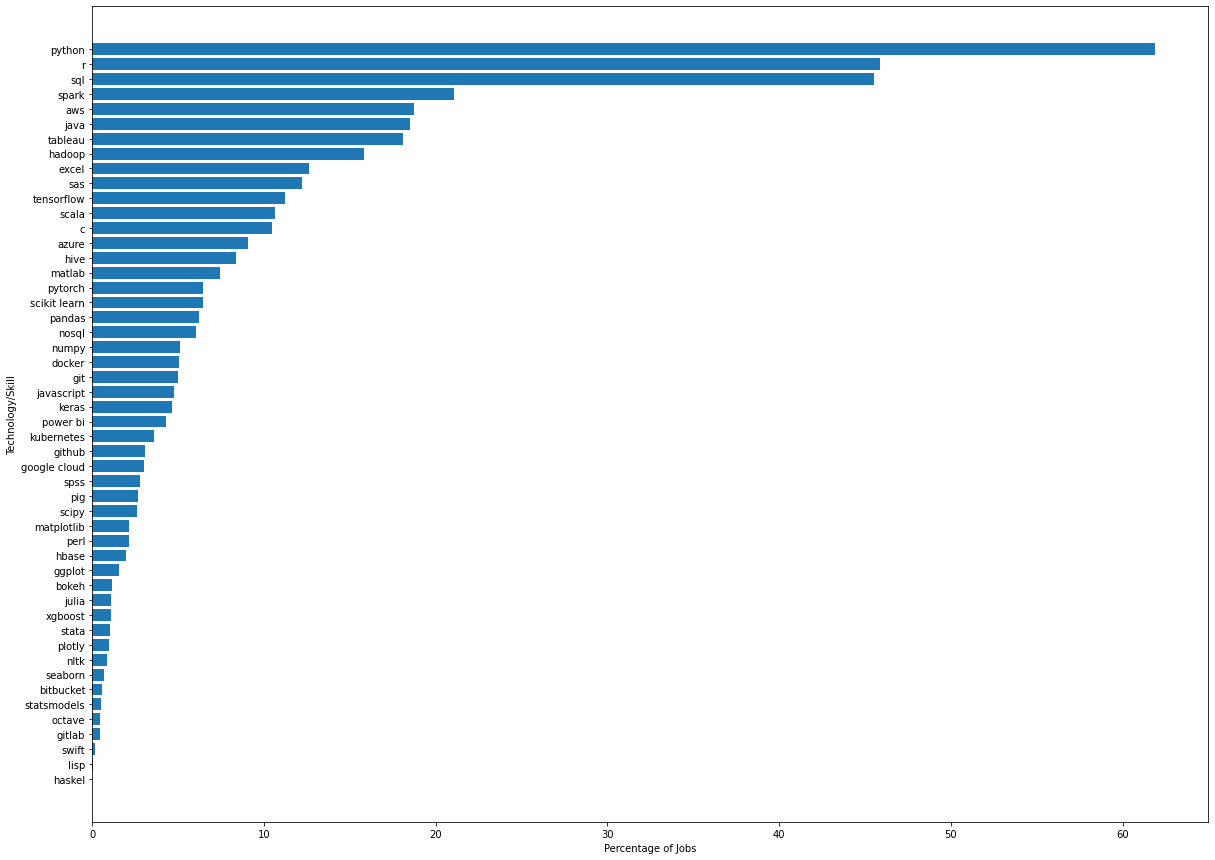

In [102]:
plt.figure(figsize=(20, 15))

plt.barh(df['Skill'], df['percentage'])
plt.xlabel("Percentage of Jobs")
plt.ylabel("Technology/Skill")

plt.show()

### By Platform

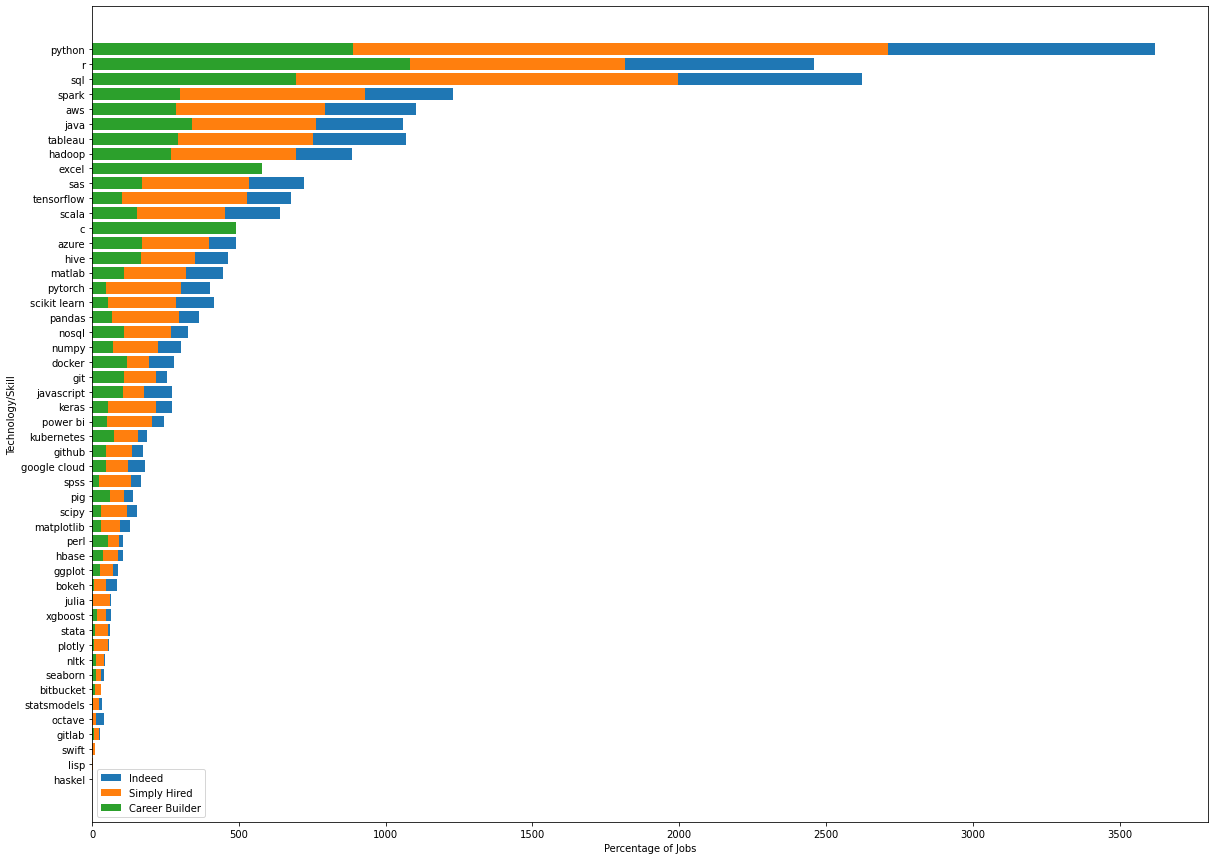

In [103]:
plt.figure(figsize=(20, 15))

plt.barh(df['Skill'], df['indeed'], label='Indeed')
plt.barh(df['Skill'], df['simply'], label='Simply Hired')
plt.barh(df['Skill'], df['career'], label='Career Builder')

plt.xlabel("Percentage of Jobs")
plt.ylabel("Technology/Skill")
plt.legend()

plt.show()

### Per Category

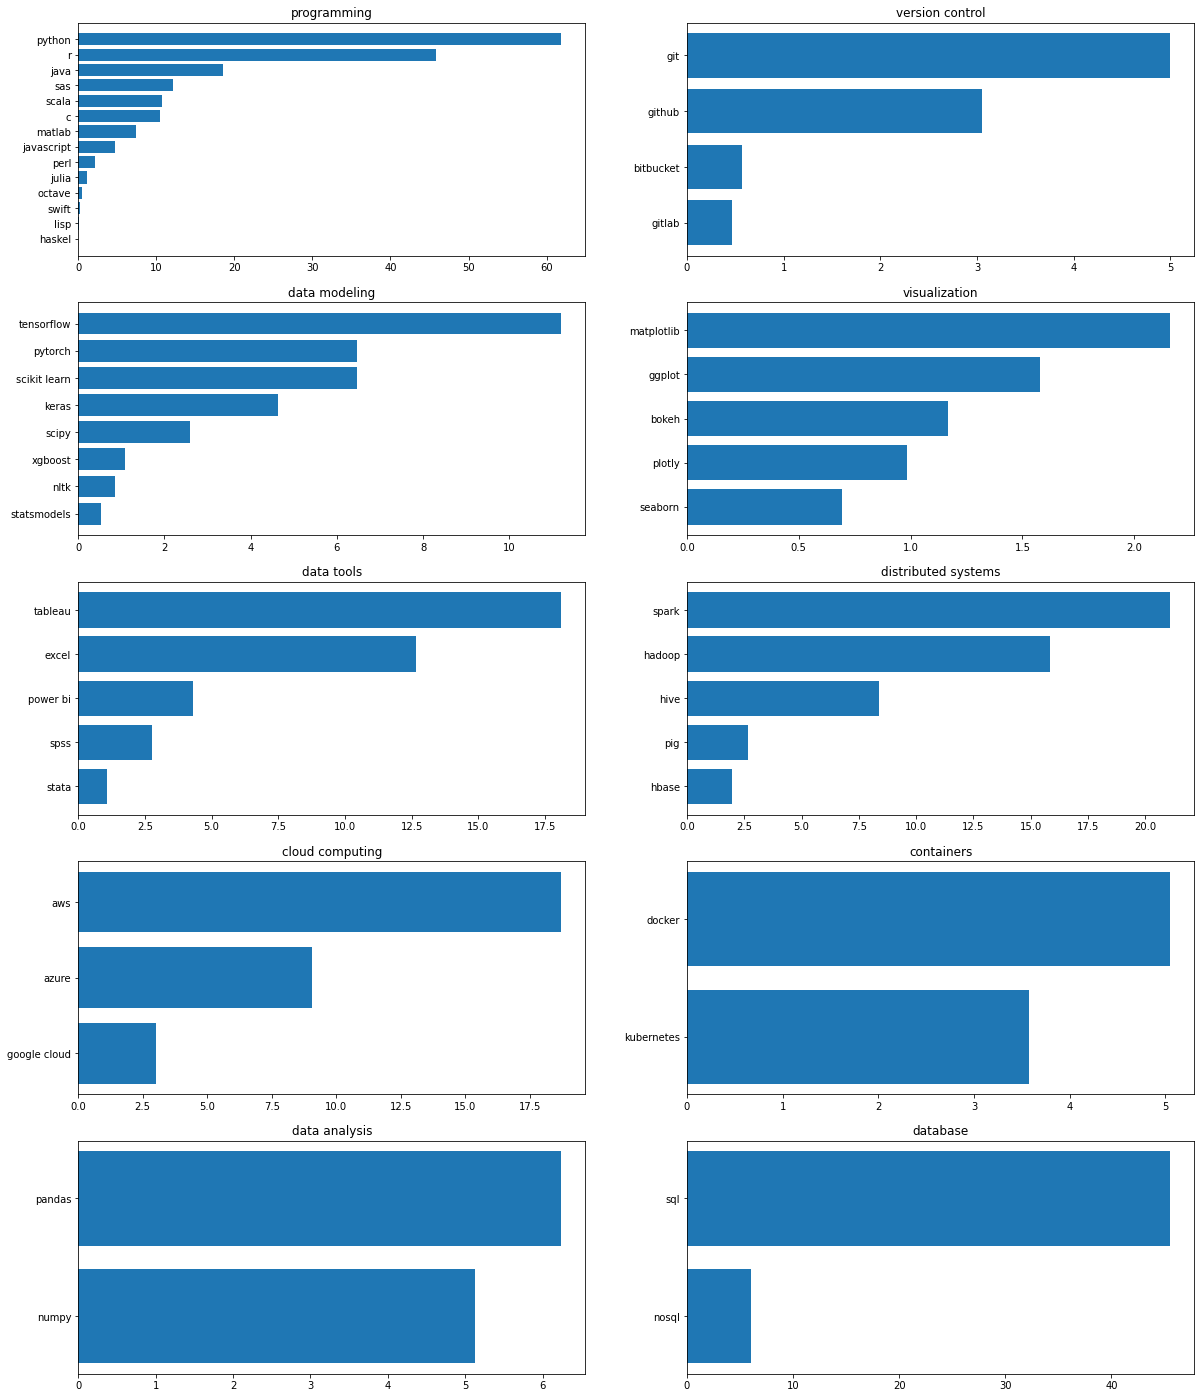

In [104]:
categories = df['Category'].unique()
plt.figure(figsize=(20, 30))

for i in range(len(categories)):
    #print(categories[i])
    data = df[df['Category'] == categories[i]]

    plt.subplot((len(categories)/2)+1,2,i+1)
    plt.barh(data['Skill'], data['percentage'])
    plt.title(categories[i])